In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use('fivethirtyeight')

import os


/kaggle/input/google-stock-data/GOOGL.csv


In [2]:
df = pd.read_csv('GOOGL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [6]:
df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df = df.set_index('Date')

In [9]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700
2022-03-24,2784.000000,2832.379883,2755.010010,2831.439941,2831.439941,1317900


In [10]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999915,0.999902,0.999808,0.999808,-0.453884
High,0.999915,1.000000,0.999877,0.999903,0.999903,-0.452855
Low,0.999902,0.999877,1.000000,0.999914,0.999914,-0.455447
Close,0.999808,0.999903,0.999914,1.000000,1.000000,-0.454252
Adj Close,0.999808,0.999903,0.999914,1.000000,1.000000,-0.454252
Volume,-0.453884,-0.452855,-0.455447,-0.454252,-0.454252,1.000000


In [11]:
df['MA30'] = df['Adj Close'].rolling(window = 30).mean()
df['MA100'] = df['Adj Close'].rolling(window = 100).mean()

In [12]:
def get_RSI(df, column = 'Adj Close', time_window = 14):
    # Return the RSI indicator for the specified time window

    diff = df[column].diff(1)

    # This preservers dimensions off diff values. 
    up_chg = 0 * diff
    down_chg = 0 * diff

    # Up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff >0] = diff[diff > 0]

    # Down change is equal to negative difference, otherwise equal to zero
    down_chg[diff < 0] = diff[diff <0]

    # We set com = time_window-1 so we get decay alpha =1/time_window.
    up_chg_avg = up_chg.ewm(com=time_window -1,min_periods = time_window).mean()
    down_chg_avg = down_chg.ewm(com = time_window -1, min_periods = time_window).mean()

    RS = abs(up_chg_avg/down_chg_avg)
    df['RSI'] = 100 - 100 / (1 + RS)

    return df

In [13]:
get_RSI(df)

,Open,High,Low,Close,Adj Close,Volume,MA30,MA100,RSI
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,NaN,NaN,NaN
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,NaN,NaN,NaN
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,NaN,NaN,NaN
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,NaN,NaN,NaN
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100,2673.897998,2802.691404,54.732490
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600,2669.103662,2802.050005,54.691847
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800,2669.548332,2800.780105,59.744297


Text(0.5, 1.0, 'Relative Strength Index')

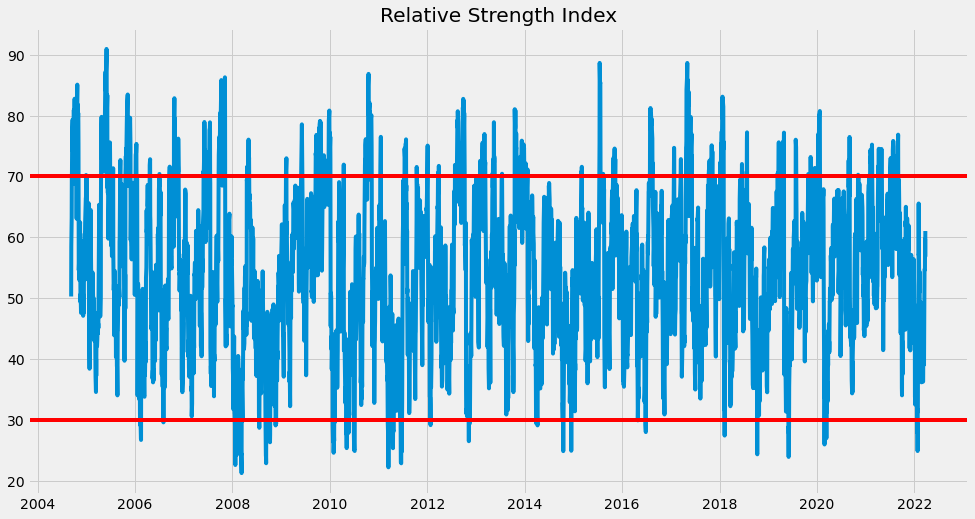

In [14]:
plt.figure(figsize = (15,8))
plt.plot(df['RSI'])
plt.axhline(y = 70,color = 'red')
plt.axhline(y = 30,color = 'red')
plt.title('Relative Strength Index')

In [15]:
data = pd.DataFrame()
data['Goog'] = df['Adj Close']
data['MA30'] = df['MA30']
data['MA100'] = df['MA100']
data

,Goog,MA30,MA100
Date,,,
2004-08-19,50.220219,NaN,NaN
2004-08-20,54.209209,NaN,NaN
2004-08-23,54.754753,NaN,NaN
2004-08-24,52.487488,NaN,NaN
2004-08-25,53.053055,NaN,NaN
...,...,...,...
2022-03-18,2722.510010,2673.897998,2802.691404
2022-03-21,2722.030029,2669.103662,2802.050005
2022-03-22,2797.360107,2669.548332,2800.780105


In [16]:
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1

    for i in range(len(data)):
        if data['MA30'][i] > data['MA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['Goog'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['MA30'][i] < data['MA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['Goog'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
            
    return (sigPriceBuy,sigPriceSell)

In [17]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [18]:
train_df = df['High'].iloc[:-4]

X_train = []
y_train = []

for i in range(2, len(train_df)):
  X_train.append(train_df[i-2:i])
  y_train.append(train_df[i])

In [19]:
import math
train_len = math.ceil(len(train_df)*0.8)
train_len

3542

In [20]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Activation, Dropout, TimeDistributed
from tensorflow.keras.models import Sequential

In [21]:
X_train, y_train= np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [22]:
model=Sequential()
model.add(LSTM(50,activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, y_train, epochs=300, batch_size=100)

2022-11-01 06:24:10.552227: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-01 06:24:10.716289: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-01 06:24:10.717098: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-01 06:24:10.718269: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300


2022-11-01 06:24:13.917856: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


45/45 [==============================] - 3s 11ms/step - loss: 624610.7500
Epoch 2/300
45/45 [==============================] - 0s 7ms/step - loss: 7946.3784
Epoch 3/300
45/45 [==============================] - 0s 6ms/step - loss: 263.8580
Epoch 4/300
45/45 [==============================] - 0s 7ms/step - loss: 249.9165
Epoch 5/300
45/45 [==============================] - 0s 6ms/step - loss: 274.3495
Epoch 6/300
45/45 [==============================] - 0s 6ms/step - loss: 257.7380
Epoch 7/300
45/45 [==============================] - 0s 6ms/step - loss: 254.2778
Epoch 8/300
45/45 [==============================] - 0s 7ms/step - loss: 253.4397
Epoch 9/300
45/45 [==============================] - 0s 6ms/step - loss: 255.2497
Epoch 10/300
45/45 [==============================] - 1s 14ms/step - loss: 259.1003
Epoch 11/300
45/45 [==============================] - 1s 14ms/step - loss: 253.7187
Epoch 12/300
45/45 [==============================] - 0s 7ms/step - loss: 252.6862
Epoch 13/300
45/45

<AxesSubplot:>

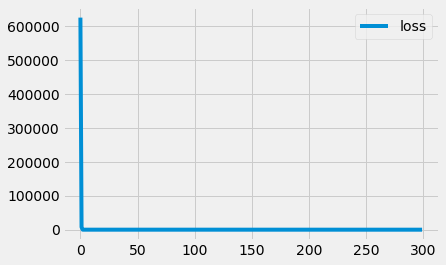

In [23]:
losse = pd.DataFrame(model.history.history)
losse[['loss']].plot()

In [24]:
test_data = train_df[train_len-2:]
X_val=[]
Y_val=[] 

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])

In [25]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
prediction = model.predict(X_val)

In [26]:
from sklearn.metrics import mean_squared_error
# Know the model error accuracy | the model accuracy 
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Train rmse: 14.644270196884861
Validation rmse: 29.5218632165911


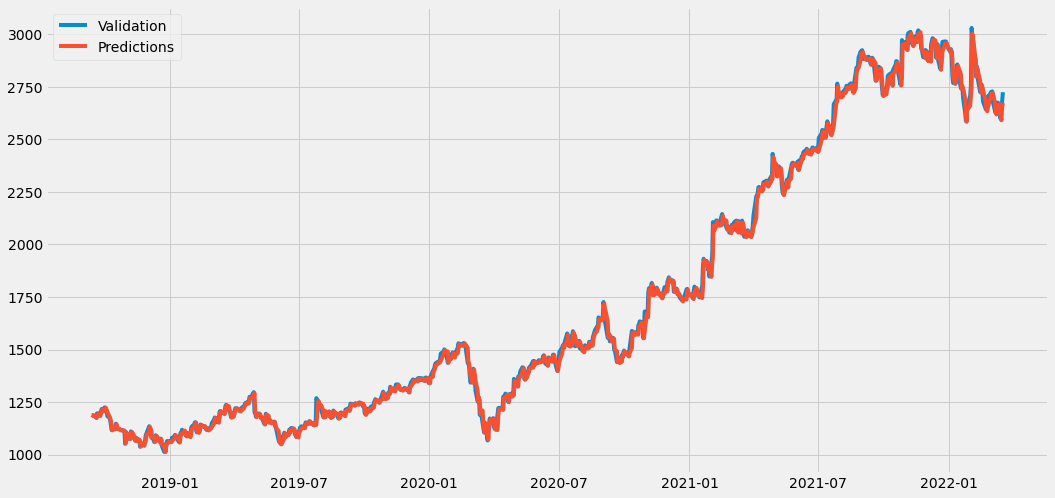

In [27]:
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred 
plt.figure(figsize=(16,8))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [28]:
variance = []
for i in range(len(valid)):
  
  variance.append(valid['High'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

,0
count,885.000000
mean,6.173668
std,28.885447
min,-91.498780
25%,-7.082886
50%,5.339600
75%,18.413818
max,285.528321


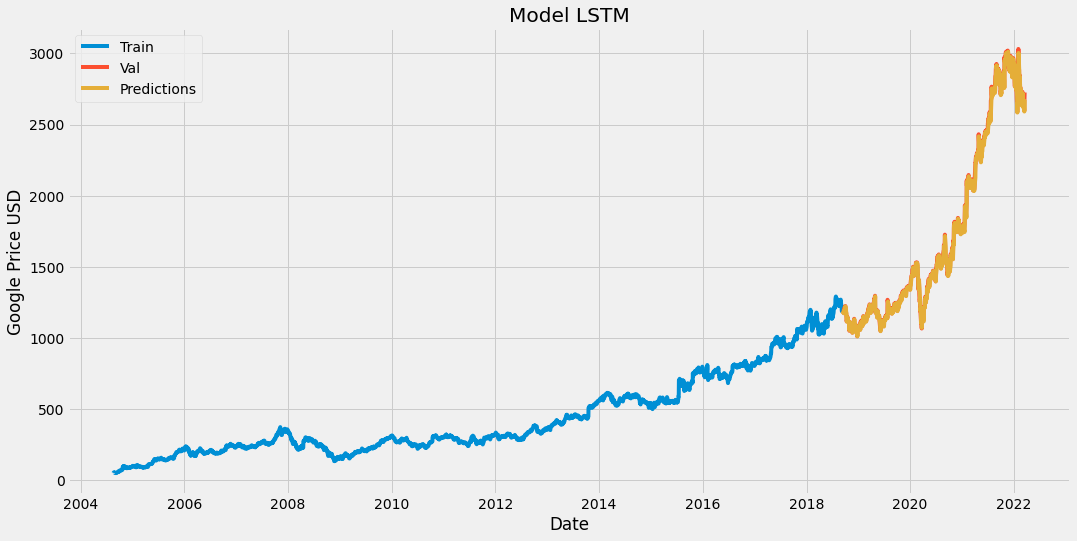

In [29]:
train = train_df[:train_len]
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Google Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()